#**Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import warnings
warnings.filterwarnings('ignore')
pd.set_option("max_rows", None)
pd.set_option('display.max_columns', 200)

#**Reading the data**


In [ ]:
df = pd.read_csv("loan.csv")

In [ ]:
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(39717, 111)

In [ ]:
pd.set_option('display.max_info_columns', 200)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

There many columns with only null values. These should be removed as part of cleaning.

#**Data Cleaning**


### **Inspect the null values**

In [ ]:
null_per = (df.isnull().sum()/len(df.index))*100
null_per[null_per==100]

mths_since_last_major_derog       100.0
annual_inc_joint                  100.0
dti_joint                         100.0
verification_status_joint         100.0
tot_coll_amt                      100.0
tot_cur_bal                       100.0
open_acc_6m                       100.0
open_il_6m                        100.0
open_il_12m                       100.0
open_il_24m                       100.0
mths_since_rcnt_il                100.0
total_bal_il                      100.0
il_util                           100.0
open_rv_12m                       100.0
open_rv_24m                       100.0
max_bal_bc                        100.0
all_util                          100.0
total_rev_hi_lim                  100.0
inq_fi                            100.0
total_cu_tl                       100.0
inq_last_12m                      100.0
acc_open_past_24mths              100.0
avg_cur_bal                       100.0
bc_open_to_buy                    100.0
bc_util                           100.0


Many features have 100% null values; These features mostly regard for candidates' bank account(s) history like number of accounts opened since x months for different types of accounts.


In [ ]:
#dropping columns whose missing values is 50% or higher

df.drop(list(null_per[null_per==100].index),axis=1,inplace=True)
print("Number of features in dataframe after dropping features with all null values: ", df.columns.shape[0])

Number of features in dataframe after dropping features with all null values:  57


###**Inspect Duplicate records**

In [ ]:
df[df.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


No duplicate records found in the dataset

### **Handling unnecessary rows/columns**


Columns like id,member_id are not revelant to the objective, let's drop them.

Columns desc,title can be dropped as we have purpose column describing gist of former columns. So let's drop these too.

Column zip_code can be dropped as we have state column available.

Let's also remove columns which describe data of post loan approval details like recoveries, out_prncp, total_pymt, delinq_2yrs, total_rec_prncp, total_rec_late_fee, total_rec_int, collection_recovery_fee, mths_since_last_delinq, mths_since_last_record, next_pymnt_d. 

In [ ]:
#dropping irrelevant columns
drop_col = ["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "mths_since_last_delinq", "mths_since_last_record"]
df.drop(drop_col,axis=1,inplace=True)
df.columns.shape

(32,)

In [ ]:
for col in df.columns:
  print(col,df[col].value_counts(dropna=True).count())

loan_amnt 885
funded_amnt_inv 8205
term 2
int_rate 371
installment 15383
grade 7
sub_grade 35
emp_length 11
home_ownership 5
annual_inc 5318
verification_status 3
issue_d 55
loan_status 3
pymnt_plan 1
purpose 14
addr_state 50
dti 2868
earliest_cr_line 526
inq_last_6mths 9
open_acc 40
pub_rec 5
revol_util 1089
total_acc 82
initial_list_status 1
collections_12_mths_ex_med 1
policy_code 1
application_type 1
acc_now_delinq 1
chargeoff_within_12_mths 1
delinq_amnt 1
pub_rec_bankruptcies 3
tax_liens 1


We have columns with only 1 unique value, which doesn't give much insight, so let's drop them.

In [ ]:
drop_col = [col for col in df.columns if (df[col].value_counts(dropna=True).count()==1)]
print("\nColumns with only 1 unique value: ",drop_col)


Columns with only 1 unique value:  ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [ ]:
df.drop(drop_col,axis=1,inplace=True)

In [ ]:
print("Number of features after handling unnecessary columns: ", df.shape[1])

Number of features after handling unnecessary columns:  23


In [ ]:
#Let's remove rows of ongoing loans as they are irrelevant to find insights to the business problem
df=df[~df['loan_status'].isin(['Current'])]
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

### **Interpreting missing values**


In [ ]:
df.isnull().sum()

loan_amnt                  0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_util                50
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64

In [ ]:
df.isna().any()[lambda x: x].index

Index(['emp_length', 'revol_util', 'pub_rec_bankruptcies'], dtype='object')

In [ ]:
df[['emp_length', 'revol_util', 'pub_rec_bankruptcies']].head()

,emp_length,revol_util,pub_rec_bankruptcies
0,10+ years,83.70%,0.0
1,< 1 year,9.40%,0.0
2,10+ years,98.50%,0.0
3,10+ years,21%,0.0
5,3 years,28.30%,0.0


In [ ]:
df['emp_length'].value_counts(dropna=False)

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
NaN          1033
Name: emp_length, dtype: int64

**Let's analyze the features with missing values against target variable**

1. Employment Length (colname = emp_length)

In [ ]:
emp_length_missing = df[df['emp_length'].isna()]
emp_length_available = df[~df['emp_length'].isna()]

print("Missing count of emp_length: ",emp_length_missing.shape[0]," i.e. around",str(round(emp_length_missing.shape[0]/df.shape[0]*100))+"%")
print("Available count of emp_length: ",emp_length_available.shape[0]," i.e. around",str(round(emp_length_available.shape[0]/df.shape[0]*100))+"%")

Missing count of emp_length:  1033  i.e. around 3%
Available count of emp_length:  37544  i.e. around 97%


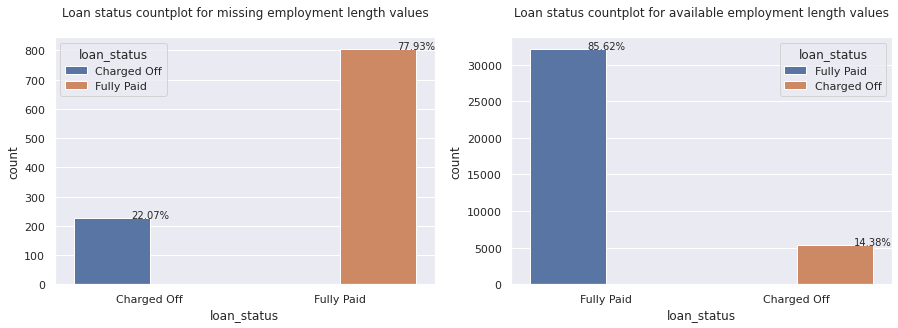

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title("Loan status countplot for missing employment length values\n")
ax=sns.countplot(data=emp_length_missing, hue='loan_status', x='loan_status')
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/len(emp_length_missing))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

plt.subplot(2,2,2)
ax = sns.countplot(data=emp_length_available, hue='loan_status', x='loan_status')
plt.title("Loan status countplot for available employment length values\n")
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/len(emp_length_available))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

Customers whose data has employment length missing in the data has significantly higher chances of defaulting than those whose employment length is present 7-8%


2. public record bankruptcies 

In [ ]:
pub_rec_bankruptcies_missing = df[df['pub_rec_bankruptcies'].isna()]
pub_rec_bankruptcies_available = df[~df['pub_rec_bankruptcies'].isna()]

print("Missing count of pub_rec_bankruptcies_missing: ",pub_rec_bankruptcies_missing.shape[0]," i.e. around",str(round(pub_rec_bankruptcies_missing.shape[0]/df.shape[0]*100))+"%")
print("Available count of pub_rec_bankruptcies_available: ",pub_rec_bankruptcies_available.shape[0]," i.e. around",str(round(pub_rec_bankruptcies_available.shape[0]/df.shape[0]*100))+"%")

Missing count of pub_rec_bankruptcies_missing:  697  i.e. around 2%
Available count of pub_rec_bankruptcies_available:  37880  i.e. around 98%


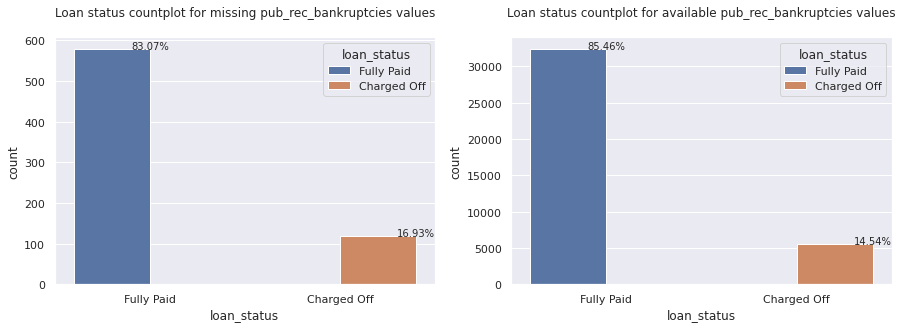

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title("Loan status countplot for missing pub_rec_bankruptcies values\n")
ax=sns.countplot(data=pub_rec_bankruptcies_missing, hue='loan_status', x='loan_status')
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/len(pub_rec_bankruptcies_missing))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

plt.subplot(2,2,2)
ax = sns.countplot(data=pub_rec_bankruptcies_available, hue='loan_status', x='loan_status')
plt.title("Loan status countplot for available pub_rec_bankruptcies values\n")
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/len(pub_rec_bankruptcies_available))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

Missing values of public record bankruptcies  does not impact the defaulting case.

3. (colname = revol_util)

In [ ]:
revol_util_missing = df[df['revol_util'].isna()]
revol_util_available = df[~df['revol_util'].isna()]

print("Missing count of revol_util: ",revol_util_missing.shape[0]," i.e. around",str((revol_util_missing.shape[0]/df.shape[0]*100))+"%")
print("Available count of revol_util: ",revol_util_available.shape[0]," i.e. around",str((revol_util_available.shape[0]/df.shape[0]*100))+"%")

Missing count of revol_util:  50  i.e. around 0.12961090805402184%
Available count of revol_util:  38527  i.e. around 99.87038909194598%


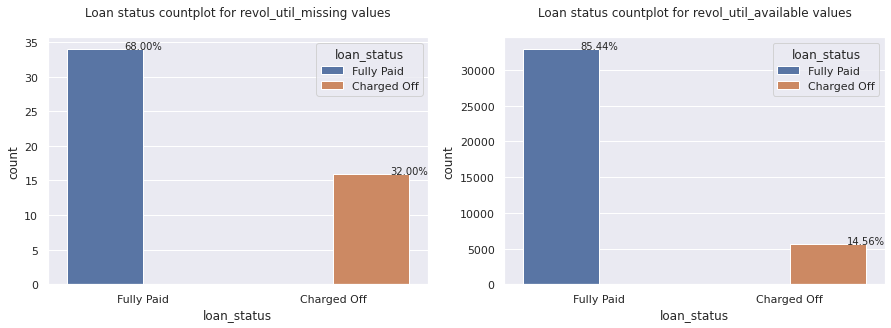

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title("Loan status countplot for revol_util_missing values\n")
ax=sns.countplot(data=revol_util_missing, hue='loan_status', x='loan_status')
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/len(revol_util_missing))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

plt.subplot(2,2,2)
ax = sns.countplot(data=revol_util_available, hue='loan_status', x='loan_status')
plt.title("Loan status countplot for revol_util_available values\n")
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/len(revol_util_available))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

Default is seen higher with missing values of revol_util values, but the missing values is significantly less. 

### **Standardizing the values and fixing data types**


In [ ]:
df.head(1)

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,Jan-85,1,3,0,83.70%,9,0.0


In [ ]:
df['term'] = df['term'].str.strip("months").astype('int')
print(df['term'].head(3))

0    36
1    60
2    36
Name: term, dtype: int64


In [ ]:
df['int_rate'] = df['int_rate'].str.strip("%").astype('float')
print(df['int_rate'].head(3))

0    10.65
1    15.27
2    15.96
Name: int_rate, dtype: float64


In [ ]:
df['revol_util'] = df['revol_util'].apply(lambda x : x if pd.isna(x) else float(x.strip("%")))
print(df['revol_util'].head(3))

0    83.7
1     9.4
2    98.5
Name: revol_util, dtype: float64


In [ ]:
import datetime as dt
df['issue_d'] = df['issue_d'].apply(lambda x: x if pd.isna(x) else dt.datetime.strptime(x,'%b-%y'))
df['issue_d'].head(3)

0   2011-12-01
1   2011-12-01
2   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [ ]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: x if pd.isna(x) else dt.datetime.strptime(x,'%b-%y'))
df['earliest_cr_line'].head(3)

0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line, dtype: datetime64[ns]

#**Univriate Analysis**

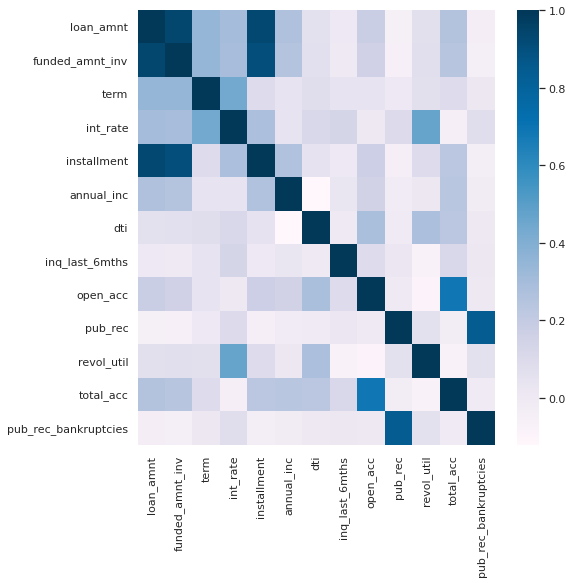

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),cmap='PuBu')
plt.show()

High correlation is found among pub_rec and pub_rec_bankruptcies which are related to public record data, open_acc and total_acc related to number of records, revol_util and int_rate, installment and loan_amount.


In [ ]:
df.describe(percentiles=[0.25,0.50,0.75,0.90,0.95])

,loan_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38527.000000,38577.000000,37880.000000
mean,11047.025430,10222.481123,41.898437,11.932219,322.466318,6.877797e+04,13.272727,0.871737,9.275423,0.055422,48.702777,22.052648,0.043479
std,7348.441646,7022.720644,10.333136,3.691327,208.639215,6.421868e+04,6.673044,1.071546,4.401588,0.237804,28.364741,11.425861,0.204583
min,500.000000,0.000000,36.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,5300.000000,5000.000000,36.000000,8.940000,165.740000,4.000000e+04,8.130000,0.000000,6.000000,0.000000,25.200000,13.000000,0.000000
50%,9600.000000,8733.440000,36.000000,11.710000,277.860000,5.886800e+04,13.370000,1.000000,9.000000,0.000000,49.100000,20.000000,0.000000
75%,15000.000000,14000.000000,36.000000,14.380000,425.550000,8.200000e+04,18.560000,1.000000,12.000000,0.000000,72.300000,29.000000,0.000000
90%,21600.000000,19975.000000,60.000000,16.820000,620.900000,1.150000e+05,22.290000,2.000000,15.000000,0.000000,87.800000,38.000000,0.000000
95%,25000.000000,24500.066590,60.000000,18.312000,760.820000,1.400040e+05,23.800000,3.000000,17.000000,1.000000,93.570000,43.000000,0.000000
max,35000.000000,35000.000000,60.000000,24.400000,1305.190000,6.000000e+06,29.990000,8.000000,44.000000,4.000000,99.900000,90.000000,2.000000


We see outliers in columns such as annual_inc and total_acc.

In [ ]:
import numpy as np
df.describe(include=[np.object])

,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,purpose,addr_state
count,38577,38577,37544,38577,38577,38577,38577,38577
unique,7,35,11,5,3,2,14,50
top,B,A4,10+ years,RENT,Not Verified,Fully Paid,debt_consolidation,CA
freq,11675,2873,8488,18480,16694,32950,18055,6949


**Here, 'top' shows the mode of the feature and 'freq' gives frequency of the mode for that feature.**





##**Analysis of Categorical variables**

In [ ]:
def normalize_values(col):
  print(round(df[col].value_counts(dropna=False,normalize=True)*100,2),"\n")

In [ ]:
def univariate_analysis(x,y,aspect_size=1.5):
  (df
  .groupby(x)[y]
  .value_counts(normalize=True)
  .mul(100)
  .rename('percent')
  .reset_index()
  .pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',aspect=aspect_size).set_xticklabels(rotation=90))

Let's understand target variable - loan_status

Fully Paid     85.41
Charged Off    14.59
Name: loan_status, dtype: float64 



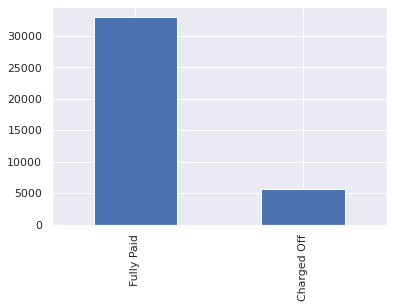

In [ ]:
normalize_values('loan_status')
df['loan_status'].value_counts(dropna=False).plot(kind='bar')

Around 85.41% of loans have been fully paid. 14.59% have been defaulted.

RENT        47.90
MORTGAGE    44.12
OWN          7.71
OTHER        0.25
NONE         0.01
Name: home_ownership, dtype: float64 



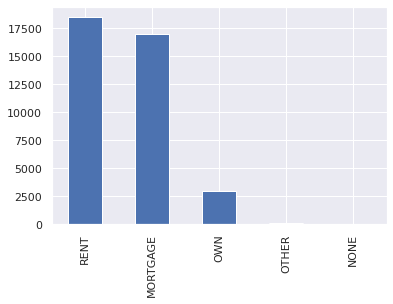

In [ ]:
normalize_values('home_ownership')
df['home_ownership'].value_counts(dropna=False).plot(kind='bar')

Majority of customers i.e. more than 90% are either Renting house or are on mortage.

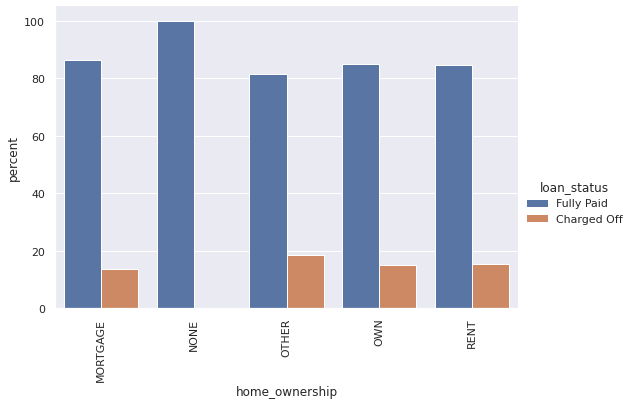

In [ ]:
univariate_analysis('home_ownership','loan_status')

Higher default risk when home_ownership type is 'Other'.

Not Verified       43.27
Verified           31.64
Source Verified    25.08
Name: verification_status, dtype: float64 



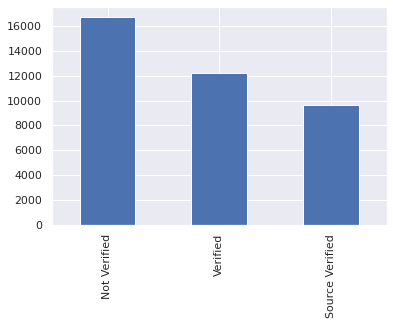

In [ ]:
normalize_values('verification_status')
df['verification_status'].value_counts(dropna=False).plot(kind='bar')

Background check of around 42.6% of loan applicants' has not been done. 

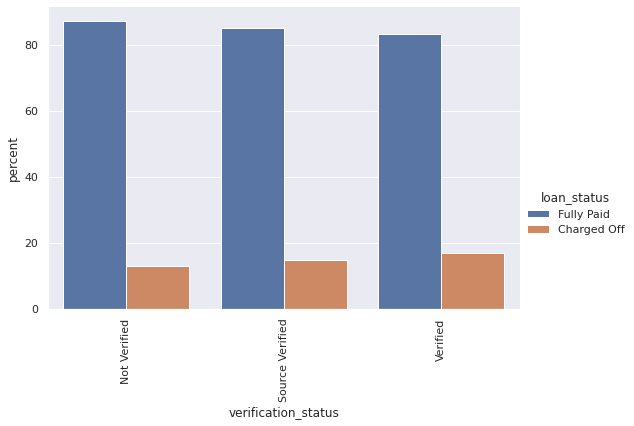

In [ ]:
univariate_analysis('verification_status','loan_status')

Contradictory to belief, here the Verified applicants tend to default more. Extra care should be taken in the verfication process.

debt_consolidation    46.80
credit_card           13.03
other                 10.02
home_improvement       7.45
major_purchase         5.57
small_business         4.55
car                    3.89
wedding                2.40
medical                1.77
moving                 1.49
vacation               0.97
house                  0.95
educational            0.84
renewable_energy       0.26
Name: purpose, dtype: float64 



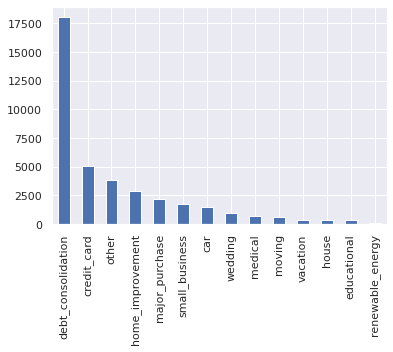

In [ ]:
normalize_values('purpose')
df['purpose'].value_counts(dropna=False).plot(kind='bar')

Around 46% of customers are applying for loan for debt_consolidation.

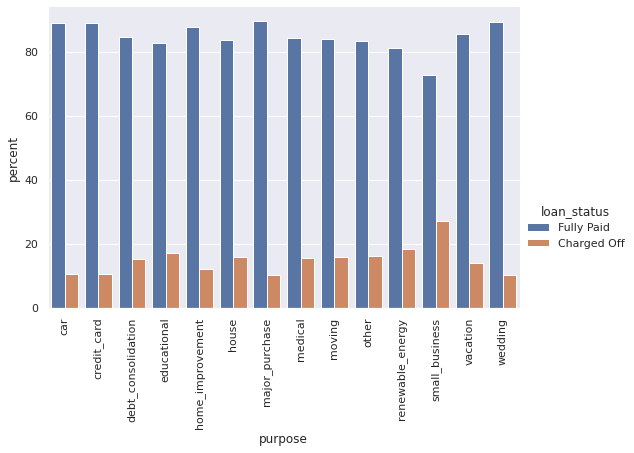

In [ ]:
univariate_analysis('purpose','loan_status')

Loans with purpose of Small business, renewable energy or educational have higher default chances than other purposes. But by significance, loans for small business should be considered carefully. 

10+ years    22.00
< 1 year     11.69
2 years      11.12
3 years      10.40
4 years       8.66
5 years       8.28
1 year        8.21
6 years       5.62
7 years       4.44
8 years       3.72
9 years       3.18
NaN           2.68
Name: emp_length, dtype: float64 



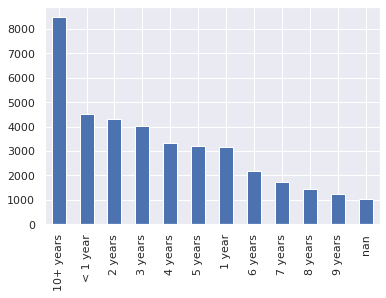

In [ ]:
normalize_values('emp_length')
df['emp_length'].value_counts(dropna=False).plot(kind='bar')

Majority of the customers have been employed for 10+years.

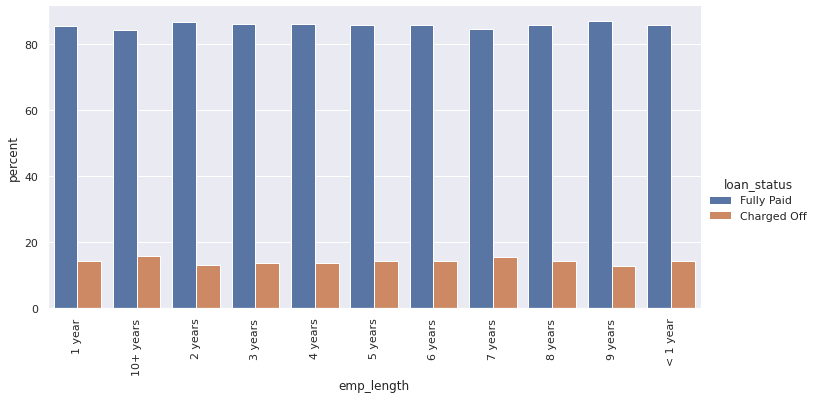

In [ ]:
univariate_analysis('emp_length','loan_status',2)

No significant tell from the plot, but customers who have been employed for 10+ years seem to have defaulted sightly higher than the rest.

B    30.26
A    26.04
C    20.31
D    13.18
E     6.90
F     2.53
G     0.78
Name: grade, dtype: float64 



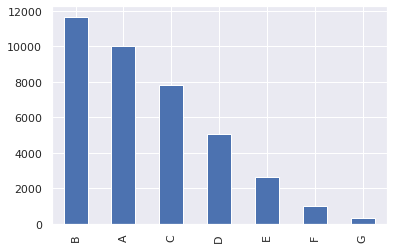

In [ ]:
normalize_values('grade')
df['grade'].value_counts(dropna=False).plot(kind='bar')

Majority of the loans are high graded.

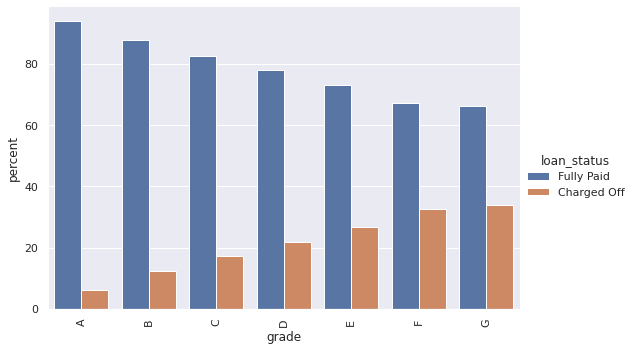

In [ ]:
univariate_analysis('grade','loan_status')

Loans having grade E,F or G tend to default at higher rate.

A4    7.45
B3    7.32
A5    7.04
B5    6.78
B4    6.32
C1    5.33
B2    5.19
C2    5.01
A3    4.69
B1    4.66
A2    3.91
C3    3.86
D2    3.33
C4    3.13
C5    2.99
A1    2.95
D3    2.89
D1    2.41
D4    2.38
D5    2.16
E1    1.87
E2    1.59
E3    1.34
E4    1.10
E5    1.00
F1    0.79
F2    0.60
F3    0.45
F4    0.39
F5    0.29
G1    0.24
G2    0.20
G4    0.14
G3    0.12
G5    0.08
Name: sub_grade, dtype: float64 



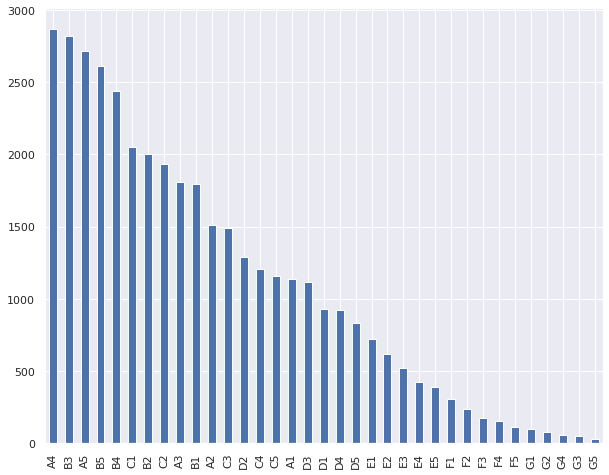

In [ ]:
normalize_values('sub_grade')
plt.figure(figsize=(10,8))
df['sub_grade'].value_counts(dropna=False).plot(kind='bar')

Majority of loans are of higher grade i.e. A,B or C

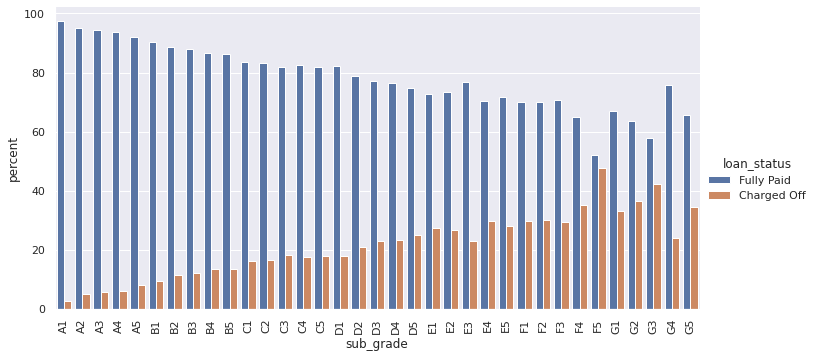

In [ ]:
univariate_analysis('sub_grade','loan_status',2)

As grade increases, default chances also increase. Need to careful with loans graded with F5,G3,G5.

CA    18.01
NY     9.59
FL     7.21
TX     6.89
NJ     4.64
IL     3.83
PA     3.81
VA     3.55
GA     3.52
MA     3.36
OH     3.05
MD     2.65
AZ     2.20
WA     2.12
CO     1.99
NC     1.94
CT     1.88
MI     1.82
MO     1.74
MN     1.57
NV     1.24
SC     1.19
WI     1.14
AL     1.13
OR     1.13
LA     1.11
KY     0.81
OK     0.74
KS     0.66
UT     0.65
AR     0.61
DC     0.55
RI     0.50
NM     0.47
WV     0.45
NH     0.43
HI     0.43
DE     0.29
MT     0.22
WY     0.21
AK     0.20
SD     0.16
VT     0.14
MS     0.05
TN     0.04
IN     0.02
ID     0.02
IA     0.01
NE     0.01
ME     0.01
Name: addr_state, dtype: float64 



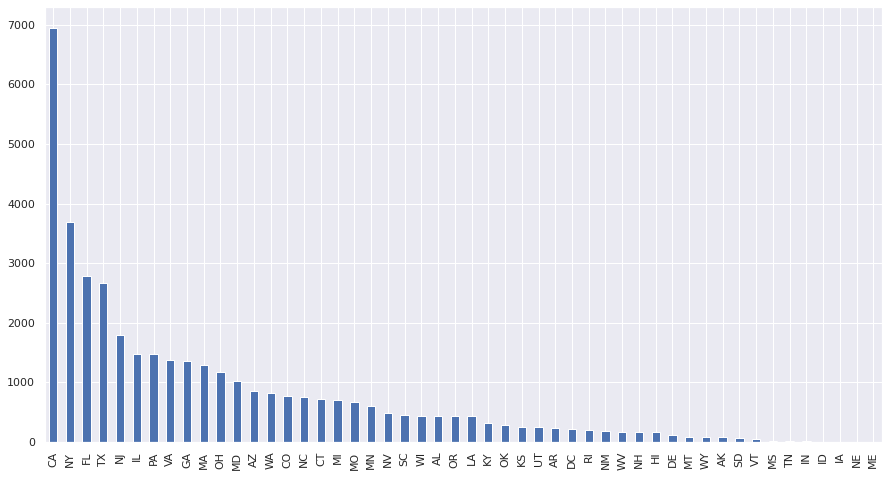

In [ ]:
normalize_values('addr_state')
plt.figure(figsize=(15,8))
df['addr_state'].value_counts(dropna=False).plot(kind='bar')

State 'CA' has higher customers compared to other states.

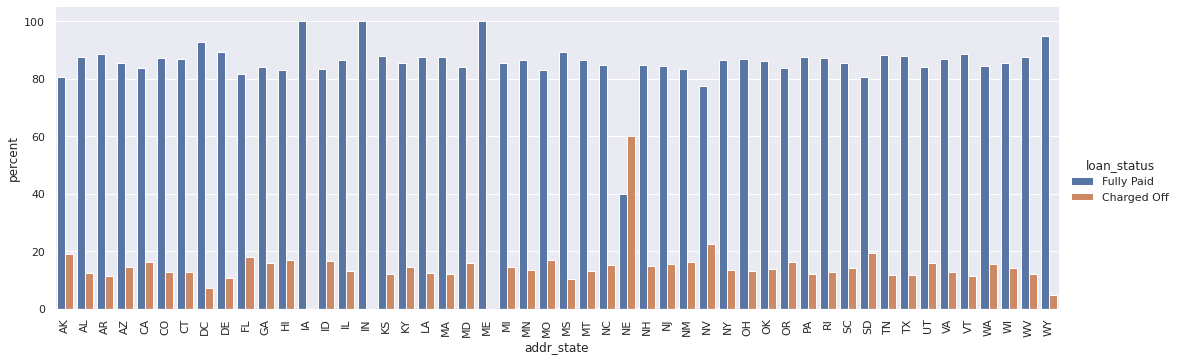

In [ ]:
univariate_analysis('addr_state','loan_status',3)

**State 'NE' loans are very suspicious. It's default ratio(60%) is higher than fully-paid ratio(40%).**

No defaults from IA,IN and ME

0.0    93.94
1.0     4.24
NaN     1.81
2.0     0.01
Name: pub_rec_bankruptcies, dtype: float64 



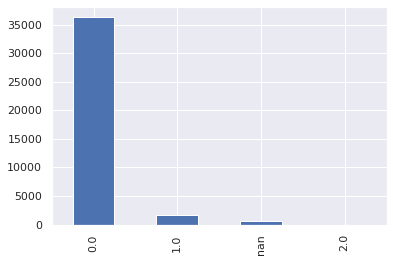

In [ ]:
normalize_values('pub_rec_bankruptcies')
df['pub_rec_bankruptcies'].value_counts(dropna=False).plot(kind='bar')

Most of the customers have 0 Number of public record bankruptcies

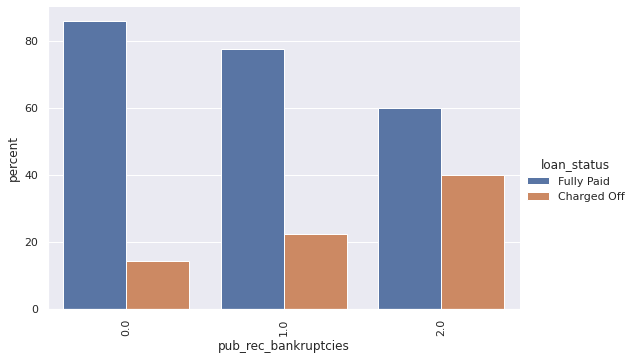

In [ ]:
univariate_analysis('pub_rec_bankruptcies','loan_status')

Higher the number of public record bankruptcies, higher chances of loan getting defaulted.

36    75.42
60    24.58
Name: term, dtype: float64 



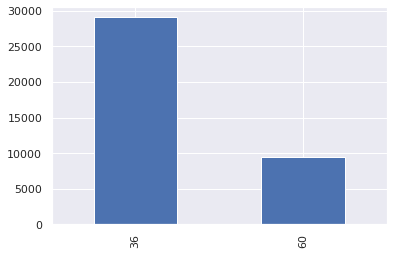

In [ ]:
normalize_values('term')
df['term'].value_counts(dropna=False).plot(kind='bar')

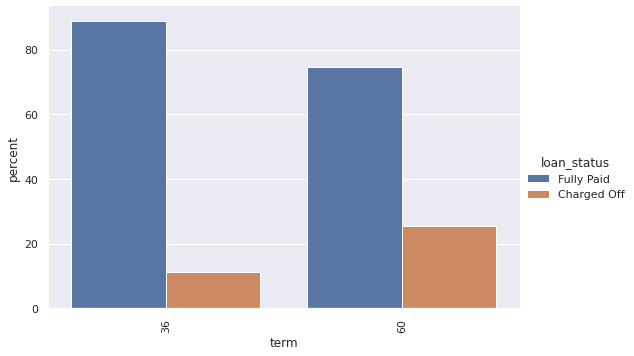

In [ ]:
univariate_analysis('term','loan_status')

Significantly higher chance of defaulting with term loan of 60 months than 36 months. 

##**Analysis of Continous variables**

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


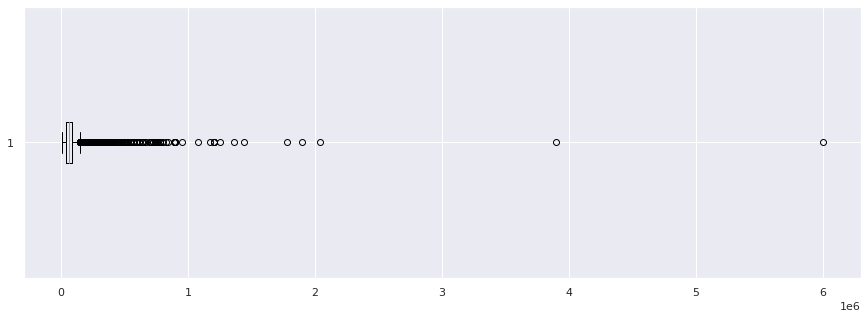

In [ ]:
print(df["annual_inc"].describe())
plt.figure(figsize=(15,5))
plt.boxplot(df["annual_inc"],vert=False)
plt.show()

There are few outliers in annual income feature at 39L and 60L. Same is evident from mean and median comparison. 

In [ ]:
#bins are created keeping the feature statistics in mind
bins = [0,40000,55000,80000,150000,6000000]
slot = ['Lowest','Low','Medium','High','Highest']

df['annual_inc_range']=pd.cut(df['annual_inc'],bins,labels=slot)

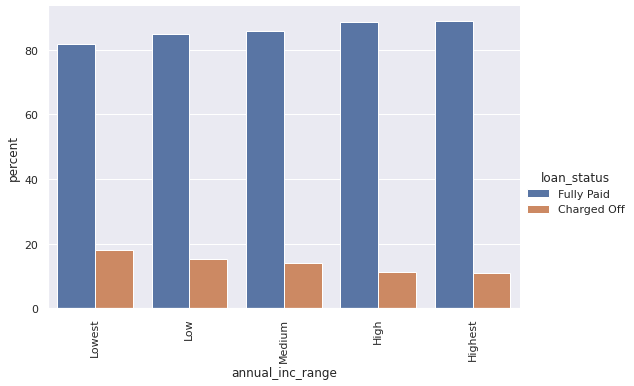

In [ ]:
univariate_analysis('annual_inc_range','loan_status')

It's clear from the plot that lower range of annual income employees tend to default more than medium range and medium more than high income employess.

In [ ]:
df.int_rate.describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [ ]:
#bins are created keeping the feature statistics in mind
bins = [5,10,15,20,25]
slot = ['5-10','10-15','15-20','20-25']

df['int_rate_range']=pd.cut(df['int_rate'],bins,labels=slot)

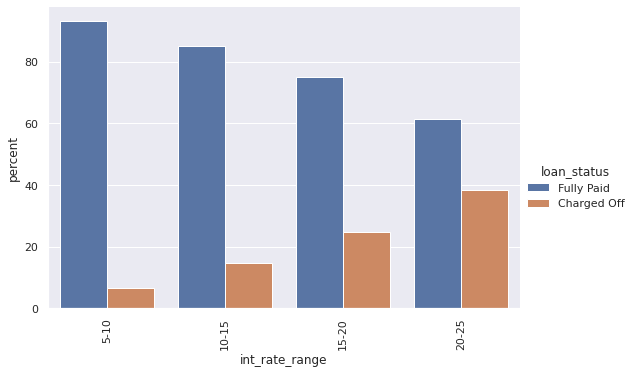

In [ ]:
univariate_analysis('int_rate_range','loan_status')

As the rate of interest increases, the default cases tend to increase too. 

**The percentage of loan being defaulted for interest rate of >15% is 25% and that of interest rate 20% or more is nearly 40%.**

In [ ]:
#annual income and dti are correlated, but still let's check the plot against target variable
df.dti.describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

In [ ]:
#bins are created keeping the feature statistics in mind
bins = [0,6,12,18,24,30]
slot = ['0-6','6-12','12-18','18-24','24-30']

df['dti_range']=pd.cut(df['dti'],bins,labels=slot)

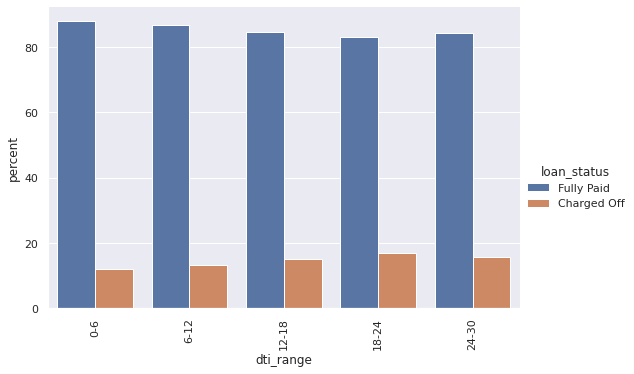

In [ ]:
univariate_analysis('dti_range','loan_status')

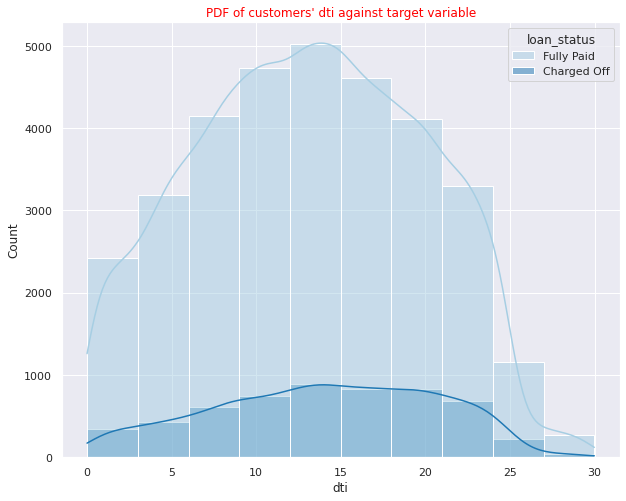

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(data=df, x='dti', kde=True, hue='loan_status', palette='Paired', bins=10)
plt.title("PDF of customers' dti against target variable", fontsize=12, color='Red')
plt.show()

dti is ratio of total monthly debt and total income.

Graph has higher density in the middle as employees with mid range income tend to take higher loans and thus possibly higher defaults. 

In [ ]:
#Derived variable
df['yearof_issue_d'] = pd.DatetimeIndex(df['issue_d']).year
year_of_issue_agg = df.groupby(by='yearof_issue_d')['loan_status'].value_counts().rename('count').reset_index()

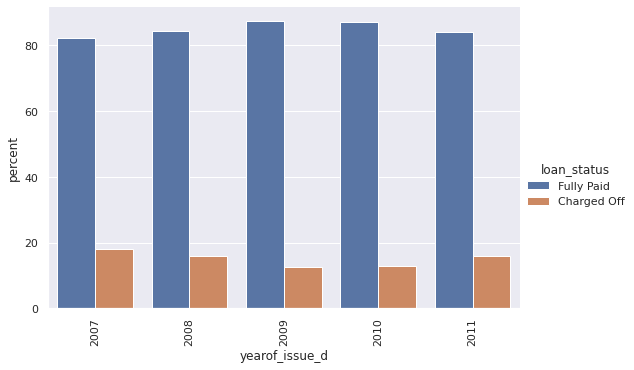

In [ ]:
univariate_analysis('yearof_issue_d','loan_status')

highest default cases in loan issue year 2007 followed by 2008,2011


count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


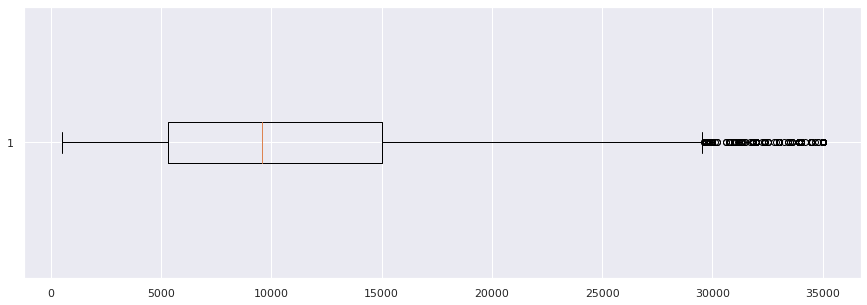

In [ ]:
print(df["loan_amnt"].describe())
plt.figure(figsize=(15,5))
plt.boxplot(df["loan_amnt"],vert=False)
plt.show()

Loan amount too has some outliers. Let's plot against target variable to check the default ratio.


In [ ]:
#bins are created keeping the feature statistics in mind
bins = [0,5000,10000,15000,20000,25000,30000,35000]
slot = ['0-5000','5000-10000','10000-15000','15000-20000','20000-25000','25000-30000','30000-35000']

df['loan_amnt_range']=pd.cut(df['loan_amnt'],bins,labels=slot)

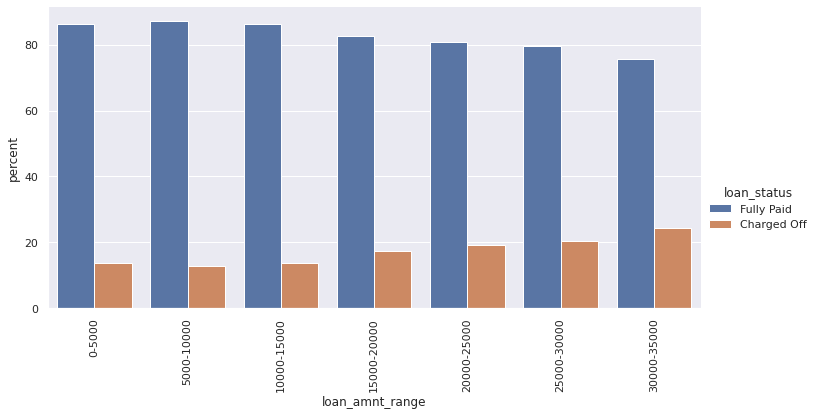

In [ ]:
univariate_analysis('loan_amnt_range','loan_status',2)

Higher the loan amount higher the chances of defaulting.

count    38577.000000
mean        22.052648
std         11.425861
min          2.000000
25%         13.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64


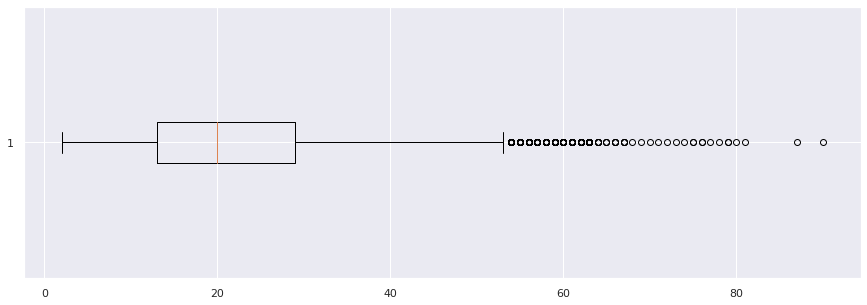

In [ ]:
print(df["total_acc"].describe())
plt.figure(figsize=(15,5))
plt.boxplot(df["total_acc"],vert=False)
plt.show()

There are some outliers in total accounts feature, which we might get some insight when plotted against target variable.

In [ ]:
#bins are created keeping the feature statistics in mind
bins = [0,15,30,45,60,75,90]
slot = ['0-15','15-30','30-45','45-60','60-75','75-90']

df['total_acc_range']=pd.cut(df['total_acc'],bins,labels=slot)

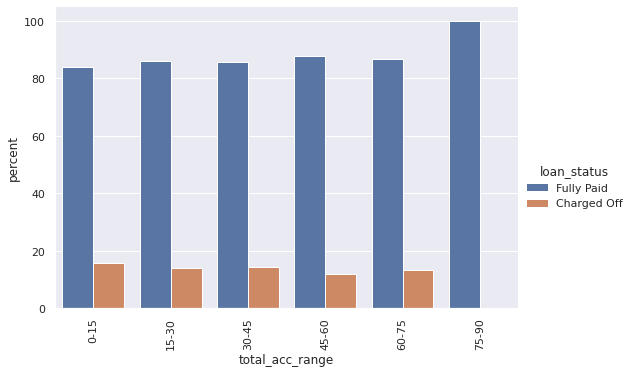

In [ ]:
univariate_analysis('total_acc_range','loan_status')

This feature doesn't seem to give much insight.

# **Bivariate Analysis**

In [ ]:
def bivariate_analysis(x,y,hue,kind='bar',aspect_size=1.5):
  sns.catplot(data=df,x=x,y=y,hue=hue,kind=kind,height=7,aspect=aspect_size).set_xticklabels(rotation=90)

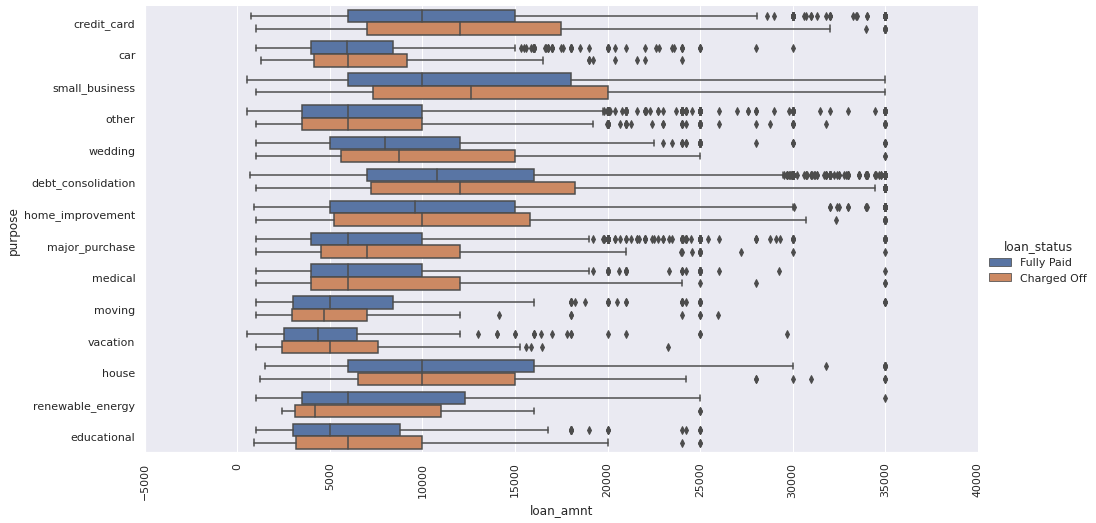

In [ ]:
bivariate_analysis('loan_amnt','purpose','loan_status','box',2)

High loans were taken for small businesses followed by debt consolidation and loans against credit cards, which have higher tendency of defaulting.

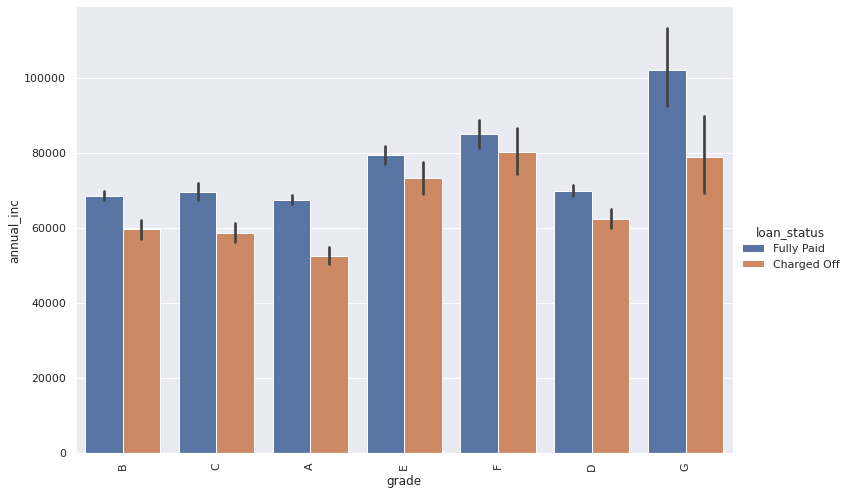

In [ ]:
bivariate_analysis('grade','annual_inc','loan_status','bar')

Higher incomes have grade in increasing manner, highest income would have grade G. 

Grades E, F and G have defaulted more. 

So, though the income is high, the loan approval/rejection should be evaluated by considering other factors like grade too.

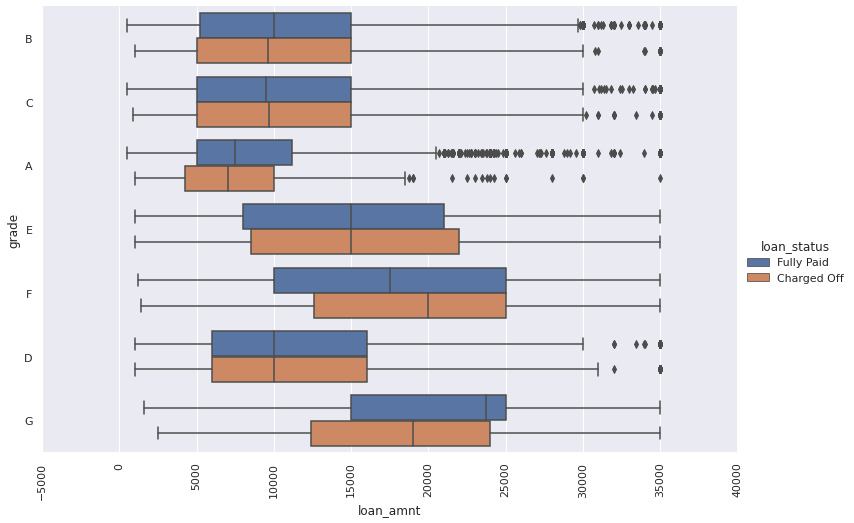

In [ ]:
bivariate_analysis('loan_amnt','grade','loan_status','box')

There seem to be exemptions in the loan amount sanctions in lower grades i.e. A,B,C & D as we see outliers. 

From the plot it's clear that these grades have defaults at higher income range. To avoid the loss, loans of higher amount can be carefully considered before approving it for lower grades.

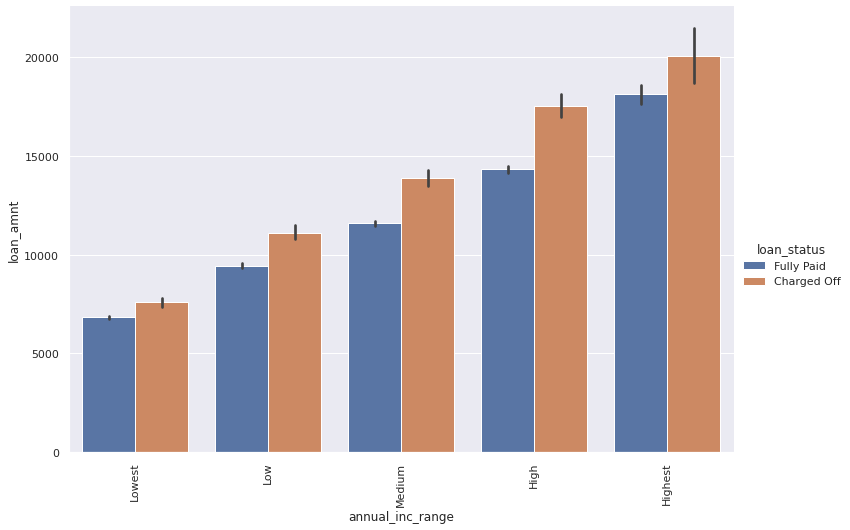

In [ ]:
bivariate_analysis('annual_inc_range','loan_amnt','loan_status','bar')

Across all income groups, higher the loan amount higher the default rates.

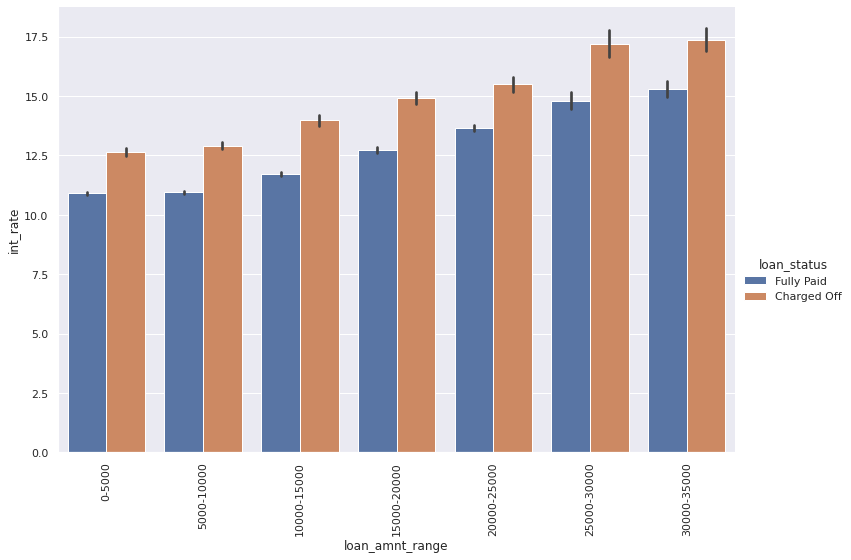

In [ ]:
bivariate_analysis('loan_amnt_range','int_rate','loan_status','bar')

Across all loan amount range, higher the interest rates higher the default rates.

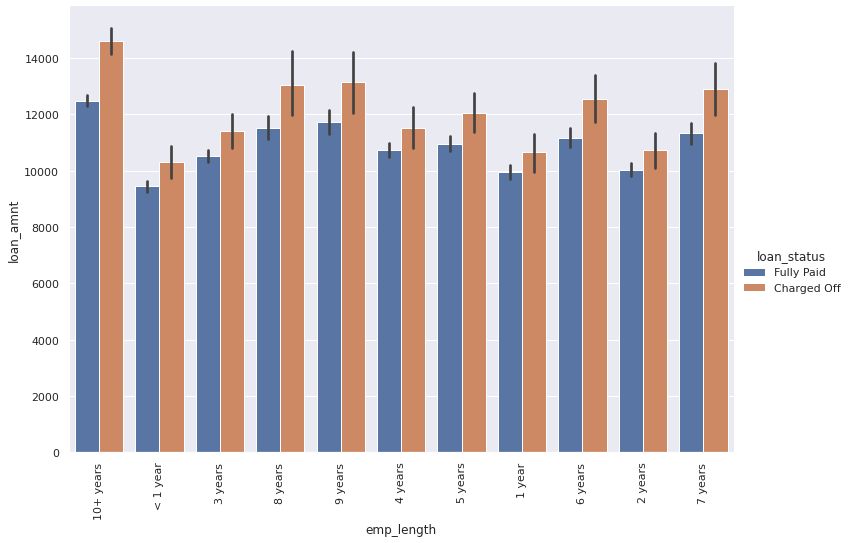

In [ ]:
bivariate_analysis('emp_length','loan_amnt','loan_status','bar')

Employees who have worked for longer have higher loan amount approved. Likewise, the charge-off is also higher with higher loan amount and especially with employees of work history with 10+ years. 

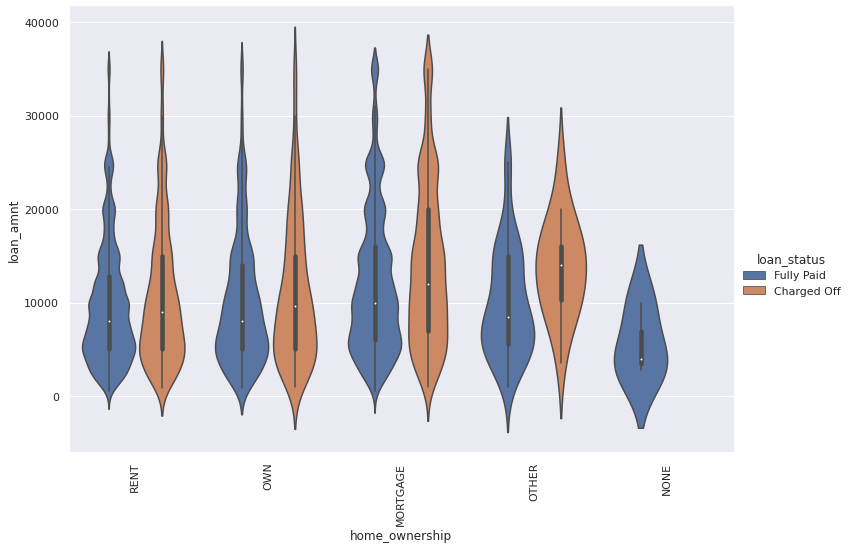

In [ ]:
bivariate_analysis('home_ownership','loan_amnt','loan_status','violin')

High loan amounts approved are majority for Mortages, high default is seen in same. Also, in home ownership of type 'Other' default tendency is significantly higher.

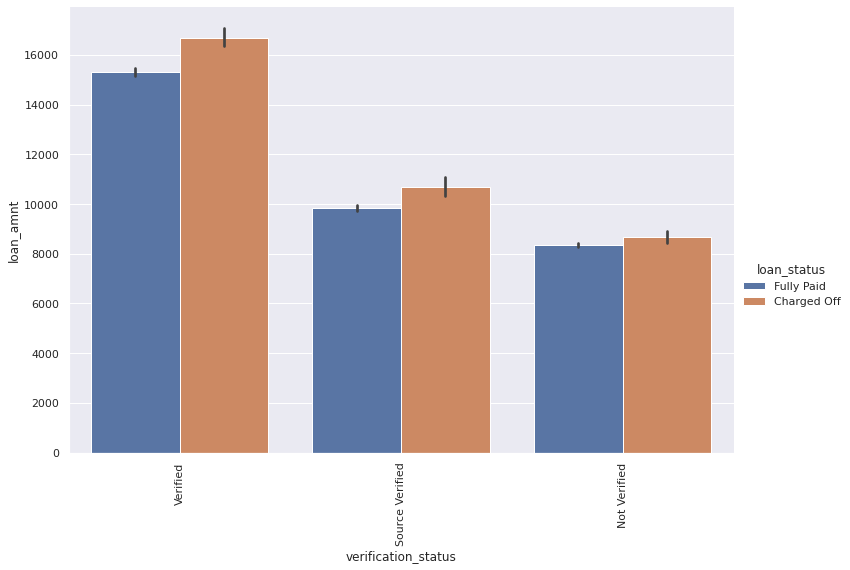

In [ ]:
bivariate_analysis('verification_status','loan_amnt','loan_status','bar')

The graph states that higher loan amount applications have been verified, however default rate is high for verified loans. 

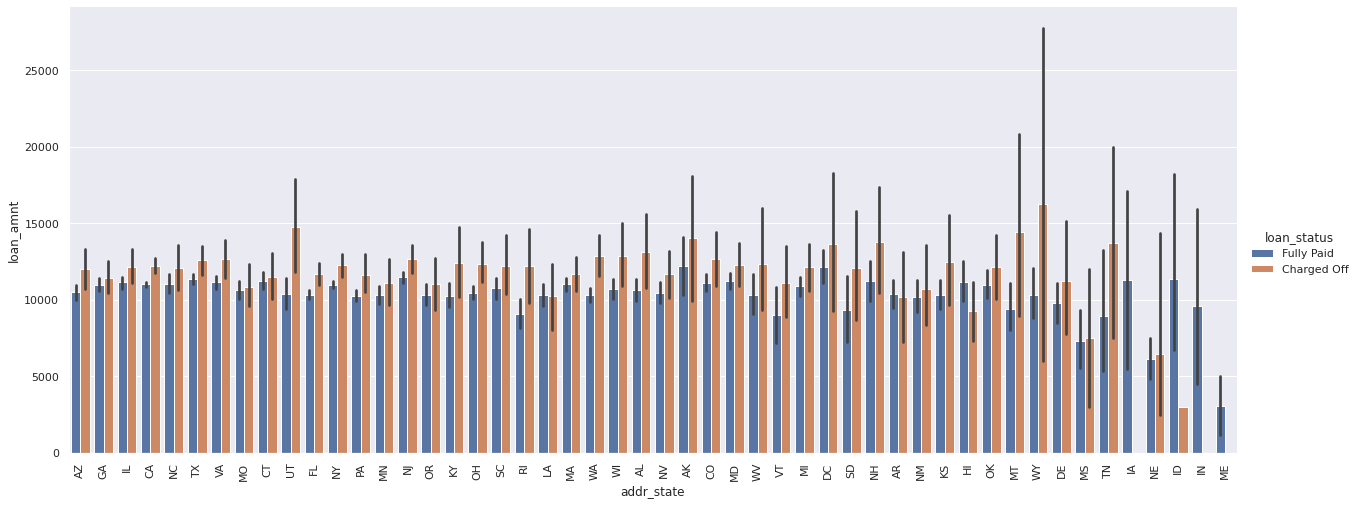

In [ ]:
bivariate_analysis('addr_state','loan_amnt','loan_status','bar',2.5)

State 'WY' with higher loan amount has seen significantly high default tendency. 

#**Key Observations** 

1. State: 

  *   States IA, IN and ME have 0 default cases and hence no risk here.
  *   Whereas states NE has higher default ratio than paying out the loan fully. And state WE has higher default cases when it comes to higher loan amounts.

2. Grade/Sub Grade:

  *   High annual income customers' loans have higher loan amount approvals and are given higher grades. 
  *   But as grades go higher, default cases increase exponentially. Subgrades F5,G3,G5 have comparatively defaulted more.

3. Verification status:
  *   Most verified loans are the ones with higher loan amount. 
  *   But interestingly, contradictory to belief, verified loans have defaulted more. This might mean that some customers might have submitted fake documents to get high loan amounts approved.

4. Employment Length:
  *   From the data plots it's clear that the Employees with 10+ years are granted higher loan amounts. These employees with 10+ years employment history have defaulted more.

5. Purpose:
  *  Loan purpose as Small business, Renewable energy have high default ratio.
  *  Higher loan amounts approved for small businesses have higher tendency of defaulting, followed by debt consolidation and loans against credit cards. 
  *  Loans for small business seem to be risky and needs to be considered with additional verification. 